## Perceptron 🧠

The best starting point for understanding neural networks is grasping the concept of the Perceptron. So, what is it? We can define the Perceptron as the fundamental building block or cell of the neural network. Let's take a closer look at how it operates and how we can implement it using Python.

The underlying idea of the perceptron is remarkably similar to the way basic units in the brain, known as Neurons, function. Neurons gather input signals with varying values (or potentials) from neighboring neurons. The neuron's core receives all these input signals from synapses and processes them into an output value that travels down through the axon. Each input carries its weight or importance. It's crucial to note that not every combination of inputs triggers the neuron into action; this depends on the shape of the neuron's activation function. Additionally, every neuron has its own threshold, sometimes referred to as Bias.

<div style="display: flex; justify-content: center;">
<img src="./images/neuron.png" alt="Neuron Structure" style="width:1000px;"/>
</div>

In the image above, we can observe one way to implement the perceptron. It involves a weighted sum of inputs, combined with the bias, which is then fed into the activation function, ultimately producing the perceptron's output.

### Let's create a perceptron class

What Considerations Matter Before Crafting a Perceptron?

- How many inputs will the perceptron have?
- What will be its activation function?
- How to create the weighted sum?

Let's delve into the last point. What does the weighted sum look like, and why do we need to use it? When creating a perceptron, it possesses internal weights, as mentioned earlier. Let's gather these weights and save them to the weights vector $\vec{w}$. Additionally, the input is not just a number; instead, it's a vector of numbers (each number for one input). Let's call it $\vec{x}$. Now, we want to multiply each input with the corresponding weight, for example, $w_1\cdot x_1 , w_2 \cdot x_2, ..$. As mentioned earlier, these multiplicants will sum up, so it should look like this:

$$
\text{weighted sum} = w_1x_1 + w_2x_x + ... + w_nx_n = \sum_{i=1}w_ix_i
$$

However, this also resembles the vector dot product. So, this can be rewritten as:

$$
\text{weighted sum} = \vec{w}\cdot\vec{x} = \sum_{i=1}w_ix_i
$$

Now, we just need to add the bias to the dot product, and the result of this, called the argument, is put into the activation function to get the final result in the form of just one number (The output of the neuron is always just one number).

In [39]:
x = np.round(np.random.rand(1, 3), 2)
w = np.round(np.random.rand(1, 3), 2) 

print(f"Input vector x: {x}")
print(f"Weights vector w: {w}")

# Manually create the weighted sum
to_sum = []
for input, weight in zip(x, w):
    to_sum.append(input * weight) # Compute the w_i * x_i and store the result in to_sum array

manual_weighted_sum = np.round(np.sum(to_sum), 2)
print(f"\nManually computed weighted sum: {manual_weighted_sum}")

# Compute the weighted sum using vector dot product
weighted_sum = np.round(np.dot(w, x.T), 2)      # We have to transpose the x vector to align the vectors for dot product
print(f"Vector dot product: {weighted_sum}")

Input vector x: [[0.45 0.24 0.88]]
Weights vector w: [[0.35 0.22 0.17]]

Manually computed weighted sum: 0.36
Vector dot product: [[0.36]]


We can clearly see that the result of dot product is the same as manual multiplication. However using the numpy we have to take in account that the numpy works with matrix representation of a vector, let's look at that so we can clearly understand why the second vector in dot product has to be transposed.

Consider two matrices $A$ and $B$:

$$
A = \begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22} \\
\end{bmatrix}

B = \begin{bmatrix}
    b_{11} & b_{12} \\
    b_{21} & b_{22} \\
\end{bmatrix}
$$

The product of matrices $A$ and $B$ is obtained by multiplying the elements of each row of $A$ with the corresponding elements of each column of $B$ and summing the results:

$$
A \cdot B = \begin{bmatrix}
    (a_{11} \cdot b_{11} + a_{12} \cdot b_{21}) & (a_{11} \cdot b_{12} + a_{12} \cdot b_{22}) \\
    (a_{21} \cdot b_{11} + a_{22} \cdot b_{21}) & (a_{21} \cdot b_{12} + a_{22} \cdot b_{22}) \\
\end{bmatrix}
$$

Simplifying the calculations:

$$
A \cdot B = \begin{bmatrix}
    a_{11} \cdot b_{11} + a_{12} \cdot b_{21} & a_{11} \cdot b_{12} + a_{12} \cdot b_{22} \\
    a_{21} \cdot b_{11} + a_{22} \cdot b_{21} & a_{21} \cdot b_{12} + a_{22} \cdot b_{22} \\
\end{bmatrix}
$$

Therefore, the product of matrices $A$ and $B$ is:

$$
A \cdot B = \begin{bmatrix}
    a_{11} \cdot b_{11} + a_{12} \cdot b_{21} & a_{11} \cdot b_{12} + a_{12} \cdot b_{22} \\
    a_{21} \cdot b_{11} + a_{22} \cdot b_{21} & a_{21} \cdot b_{12} + a_{22} \cdot b_{22} \\
\end{bmatrix}
$$

You can also define a vector in this representation and it can be defined in two different ways.

- Column vector:
\begin{bmatrix}
    a \\
    b \\
    c \\
\end{bmatrix}

- Row vector:
\begin{bmatrix}
    a & b & c \\
\end{bmatrix}

When attempting to multiply two column vectors using the rules of matrix multiplication, challenges arise due to missing values in other dimensions. This is because you now have one matrix in the form (1 x 3), which can only be multiplied by a matrix with the following dimensions (3 x n), where n is any positive integer. To generalize this rule, we express it as the standard matrix multiplication condition.

Two matrices, denoted as $\mathbb{A}$ and $\mathbb{B}$, can be multiplied only if their dimensions satisfy the condition: $dim(\mathbb{A}) = (m, n) \wedge dim(\mathbb{B}) = (n, l)$ where ${m, n, l} \in \mathbb{N}$.


For instance, if we aim to multiply a row vector $\vec{x}$ with $dim(\vec{x}) = (1, 3)$ by another row vector $\vec{w}$ with $dim(\vec{w}) = (1, 3)$ we do not meet the condition. However, by transposing $\vec{w}$, we satisfy the condition. Thus, we can perform the multiplication as follows:

$$

dotproduct = \vec{x}\cdot\vec{w}^T

$$

In [21]:
import numpy as np

class Perceptron:
    def __init__(self, n_inputs, activation=any):
        self.weights = np.round(np.random.rand(n_inputs, 1), 2)     # Initialize random weights
        self.bias = np.round(np.random.rand(), 2)                   # Initialize random bias
        self.activation = activation                    

    def process(self, input):
        weighted_sum = np.dot(input, self.weights.T)
        argument = weighted_sum + self.bias
        output = self.activation(argument)
        return output

### Activations

The activation function introduces additional complexity to the process of input conversion. One of the most compelling reasons for applying the activation function is its ability to introduce non-linearity into an otherwise linear system. Without using the activation function, we would be left with a perceptron that produces an exhaustive set of linear combinations of the input vector but fails to transform it into a different one.

Here are some examples of the most used activation functions:

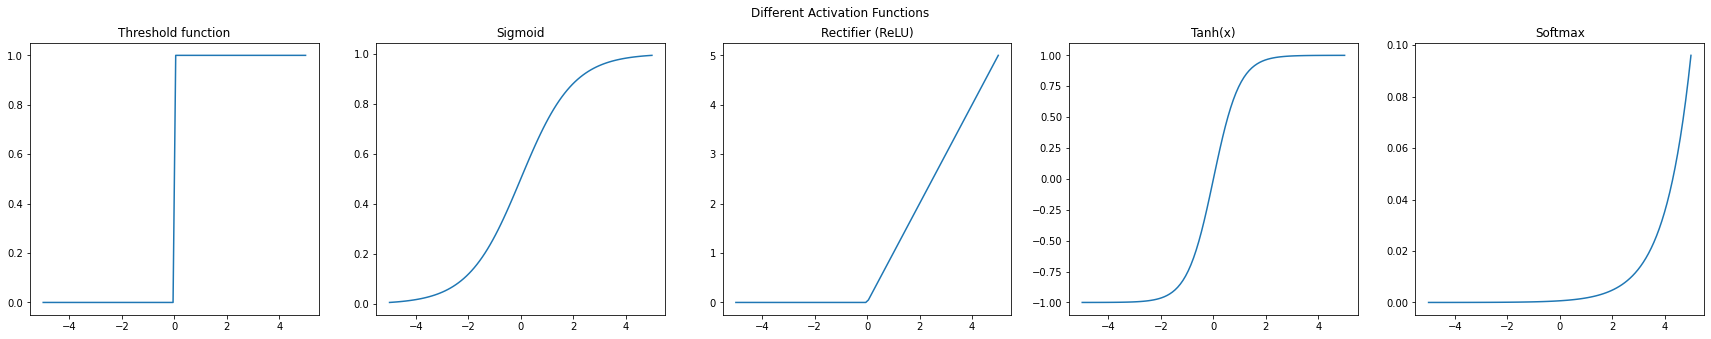

In [47]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

# Step (Threshold) function
def theta(x):
    return np.heaviside(x, 0)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Rectifier (ReLU) function
def relu(x):
    return np.maximum(0, x)

# Hyperbolic tangent function
def tanh(x):
    return np.tanh(x)

# Softmax function
def softmax(x):
    exp_values = np.exp(x - np.max(x))
    return exp_values / exp_values.sum(axis=0, keepdims=True)

# Plotting
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.suptitle('Different Activation Functions')
fig.set_size_inches(30, 5)

ax1.plot(x, theta(x))
ax1.set_title("Threshold function")

ax2.plot(x, sigmoid(x))
ax2.set_title("Sigmoid")

ax3.plot(x, relu(x))
ax3.set_title("Rectifier (ReLU)")

ax4.plot(x, tanh(x))
ax4.set_title("Tanh(x)")

ax5.plot(x, softmax(x))
ax5.set_title("Softmax")

plt.show()

The Threshold Function, historically employed as a binary activation in perceptrons, produces an output of 0 or 1 based on whether the input surpasses a predetermined threshold. Moving on to the Sigmoid Function, frequently employed in the output layer of binary classification models, it maps input values to a range between 0 and 1, representing probabilities. The Rectifier (ReLU) Function, a widely adopted activation function in hidden layers, effectively addresses the vanishing gradient problem, allowing the model to adeptly learn intricate patterns. The Hyperbolic Tangent (Tanh) Function, akin to the sigmoid, generates outputs between -1 and 1. It finds application in scenarios where zero-centered outputs are preferable. Lastly, the Softmax Function is commonly utilized in the output layer of multi-class classification models. It transforms raw scores into probabilities, ensuring their summation equates to 1—particularly advantageous when dealing with multiple mutually exclusive classes.

### Let's Try It Out

In [53]:
# Define different types of perceptrons
relu_perceptron = Perceptron(n_inputs=3, activation=relu)
tanh_perceptron = Perceptron(n_inputs=3, activation=tanh)
softmax_perceptron = Perceptron(n_inputs=3, activation=softmax)
sigmoid_perceptron = Perceptron(n_inputs=3, activation=sigmoid)
theta_perceptron = Perceptron(n_inputs=3, activation=theta)

In [54]:
# Create a set of vectors that will represent few 3 samples of data in RGB code
red = np.array([1, 0, 0])
green = np.array([0, 1, 0])
blue = np.array([0, 0, 1])
colors = np.array([red, green, blue])

# Now compute the results for each perceptron and store them into the own perceptron results array
relu_results = [Perceptron(n_inputs=3, activation=relu).process(color)[0] for color in colors]
tanh_results = [Perceptron(n_inputs=3, activation=tanh).process(color)[0] for color in colors]
softmax_results = [Perceptron(n_inputs=3, activation=softmax).process(color)[0] for color in colors]
sigmoid_results = [Perceptron(n_inputs=3, activation=sigmoid).process(color)[0] for color in colors]
theta_results = [Perceptron(n_inputs=3, activation=theta).process(color)[0] for color in colors]

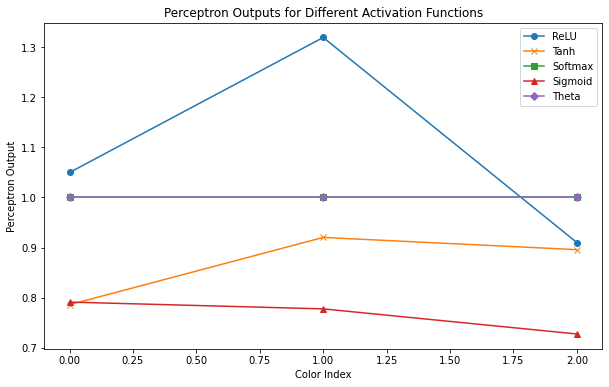

In [55]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(colors)), relu_results, label='ReLU', marker='o')
plt.plot(range(len(colors)), tanh_results, label='Tanh', marker='x')
plt.plot(range(len(colors)), softmax_results, label='Softmax', marker='s')
plt.plot(range(len(colors)), sigmoid_results, label='Sigmoid', marker='^')
plt.plot(range(len(colors)), theta_results, label='Theta', marker='D')

plt.title('Perceptron Outputs for Different Activation Functions')
plt.xlabel('Color Index')
plt.ylabel('Perceptron Output')
plt.legend()
plt.show()

##### **NOTE:** If you rerun the cell where we have defined the perceptrons, the weights and biases will change (those are defined randomly) so the output from the perceptrons will be different. Let's play with different weights, biases and maybe also try to change the input arrays.

### Try to chain the Perceptrons

In [86]:
# Define the perceptron in the same cell as you run the computation and in every new cell run youll get different results due to weights reinitialization
pct_1 = Perceptron(n_inputs=3, activation=relu)
pct_2 = Perceptron(n_inputs=1, activation=tanh)
pct_3 = Perceptron(n_inputs=1, activation=softmax)

x_vector = np.array([-1, -10, 0])

res_1 = pct_1.process(x_vector)
print(f"PCT 1 result: {res_1}")
res_2 = pct_2.process(res_1)
print(f"PCT 2 result: {res_2}")
res_3 = pct_3.process(res_2)
print(f"PCT 3 result: {res_3}")

PCT 1 result: [0.]
PCT 2 result: [0.7305939]
PCT 3 result: [1.]


In [87]:
# Define the perceptron in the different cell as you run the computation and change the order of the perceptrons to see how the results change
x_vector = np.array([-1, 10, -10])

res_1 = pct_1.process(x_vector)
print(f"PCT 1 result: {res_1}")
res_2 = pct_3.process(res_1)
print(f"PCT 3 result: {res_2}")
res_3 = pct_2.process(res_2)
print(f"PCT 2 result: {res_3}")

PCT 1 result: [4.06]
PCT 3 result: [1.]
PCT 2 result: [0.95174596]


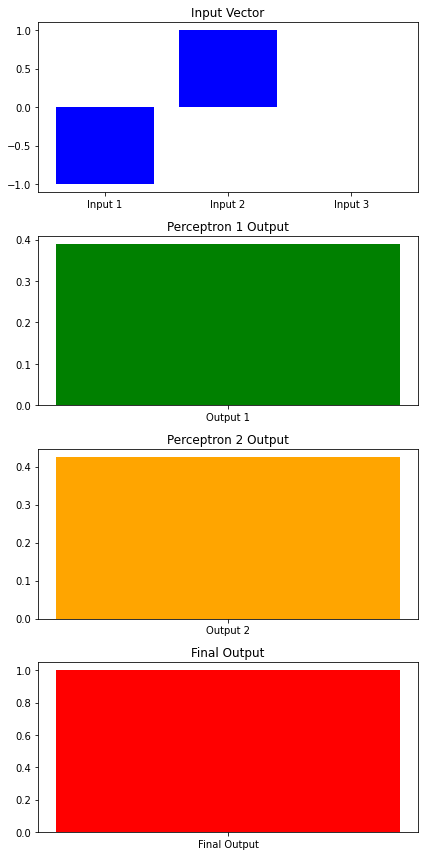

In [93]:
# Initialize perceptrons with different activations
pct_1 = Perceptron(n_inputs=3, activation=relu)
pct_2 = Perceptron(n_inputs=1, activation=tanh)
pct_3 = Perceptron(n_inputs=1, activation=softmax)

# Input vector
x_vector = np.array([-1, 1, 0])

# Process through perceptrons
res_1 = pct_1.process(x_vector)
res_2 = pct_2.process(res_1)
res_3 = pct_3.process(res_2)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(6, 12))

# Plot the input vector
axs[0].bar(range(len(x_vector)), x_vector, color='blue')
axs[0].set_title('Input Vector')
axs[0].set_xticks(range(len(x_vector)))
axs[0].set_xticklabels(['Input 1', 'Input 2', 'Input 3'])

# Plot the result of the first perceptron
axs[1].bar(range(len(res_1)), res_1, color='green')
axs[1].set_title('Perceptron 1 Output')
axs[1].set_xticks(range(len(res_1)))
axs[1].set_xticklabels(['Output 1'])

# Plot the result of the second perceptron
axs[2].bar(range(len(res_2)), res_2, color='orange')
axs[2].set_title('Perceptron 2 Output')
axs[2].set_xticks(range(len(res_2)))
axs[2].set_xticklabels(['Output 2'])

# Plot the final result
axs[3].bar(range(len(res_3)), res_3, color='red')
axs[3].set_title('Final Output')
axs[3].set_xticks(range(len(res_3)))
axs[3].set_xticklabels(['Final Output'])

plt.tight_layout()
plt.show()

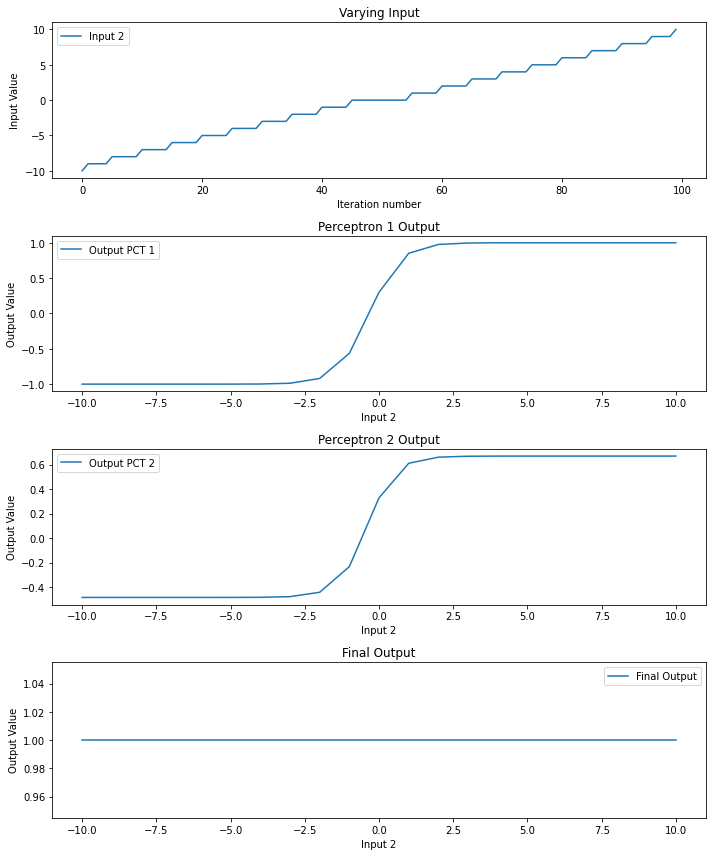

In [103]:

# Function to vary one input linearly while keeping others constant
def vary_input_linearly(input_vector, input_index, num_points):
    varied_inputs = np.tile(input_vector, (num_points, 1))
    varied_inputs[:, input_index] = np.linspace(-10, 10, num_points)
    return varied_inputs

# Initialize perceptrons with different activations
pct_1 = Perceptron(n_inputs=3, activation=tanh)
pct_2 = Perceptron(n_inputs=1, activation=tanh)
pct_3 = Perceptron(n_inputs=1, activation=softmax)

# Function to process inputs through the perceptron chain
def process_inputs(inputs):
    res_1 = pct_1.process(inputs)
    res_2 = pct_2.process(res_1)
    res_3 = pct_3.process(res_2)
    return res_1, res_2, res_3

# Vary one input linearly while keeping others constant
num_points = 100
varying_input_index = 1  # Change this index to vary a different input
varying_inputs = vary_input_linearly(np.array([0, -100, 0]), varying_input_index, num_points)

# Process varied inputs through perceptron chain and save results
outputs = [process_inputs(input) for input in varying_inputs]

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 12))


# Plot the varied input
axs[0].plot(varying_inputs[:, varying_input_index], label=f'Input {varying_input_index + 1}')
axs[0].set_title('Varying Input')
axs[0].set_xlabel(f'Iteration number')
axs[0].set_ylabel('Input Value')
axs[0].legend()

# Plot the output of the first perceptron
axs[1].plot(varying_inputs[:, varying_input_index], [output[0] for output in outputs], label='Output PCT 1')
axs[1].set_title('Perceptron 1 Output')
axs[1].set_xlabel(f'Input {varying_input_index + 1}')
axs[1].set_ylabel('Output Value')
axs[1].legend()

# Plot the output of the second perceptron
axs[2].plot(varying_inputs[:, varying_input_index], [output[1] for output in outputs], label='Output PCT 2')
axs[2].set_title('Perceptron 2 Output')
axs[2].set_xlabel(f'Input {varying_input_index + 1}')
axs[2].set_ylabel('Output Value')
axs[2].legend()

# Plot the final output
axs[3].plot(varying_inputs[:, varying_input_index], [output[2] for output in outputs], label='Final Output')
axs[3].set_title('Final Output')
axs[3].set_xlabel(f'Input {varying_input_index + 1}')
axs[3].set_ylabel('Output Value')
axs[3].legend()

plt.tight_layout()
plt.show()